<h2> Import Statements </h2>

In [477]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error,r2_score, classification_report, max_error
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings ('ignore')
import seaborn as sns
#adjusted r2 formula

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
def calculate_adj_r2(r_sq, n, k):

    adj_r = 1-((1-r_sq)*(n-1)/(n-k-1))
   
    return adj_r

<h2> Reading Data from CSV </h2>

In [478]:
def LabelEncode(df_local):
    for col in df_local.columns:
        col_dict = {}
        if df_local[col].dtype!='object':
            continue
        elif df_local[col].dtype=='object':
            col2=df_local[col].unique()
            z=0
            for i in col2:
                col_dict[i]=z
                z+=1
            df_local[col]=df_local[col].map(col_dict)
        
            
    return df_local

data=pd.read_csv("auto-mpg.csv")
data.head()

print(data.columns)
data.fillna(0)
print(data.columns)
df_encode = LabelEncode(data)
df_encode.shape

X = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']
Y = ['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)
df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
print(df_train.size)
print(df_test.size)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
2086
700


In [479]:

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.1 KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,34.193467,2970.424623,15.568090,76.010050,1.572864,135.776382
std,7.815984,1.701004,104.269838,24.397738,846.841774,2.757689,3.697627,0.802055,89.114382
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,14.000000,2223.750000,13.825000,73.000000,1.000000,55.250000
50%,23.000000,4.000000,148.500000,28.000000,2803.500000,15.500000,76.000000,1.000000,128.500000
75%,29.000000,8.000000,262.000000,53.000000,3608.000000,17.175000,79.000000,2.000000,211.750000
max,46.600000,8.000000,455.000000,93.000000,5140.000000,24.800000,82.000000,3.000000,304.000000


<h2> Exploratory Data Analysis </h2>

3582


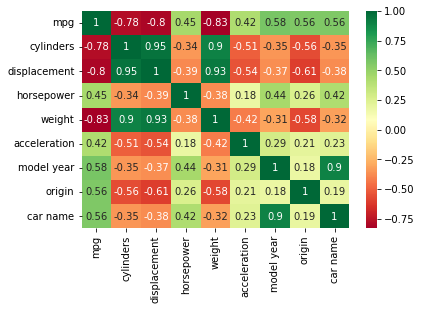

In [480]:

data.drop_duplicates()
print(data.size)
corr = data.corr()

sns.heatmap(corr, cmap ='RdYlGn', annot = True)
plt.show() 


<h2> Data Plots </h2>

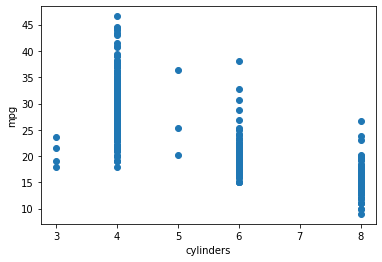

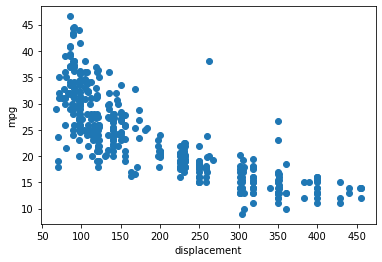

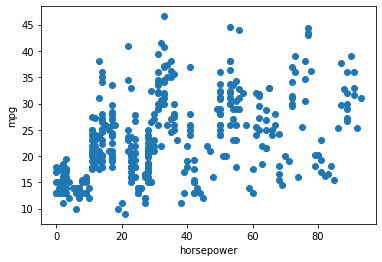

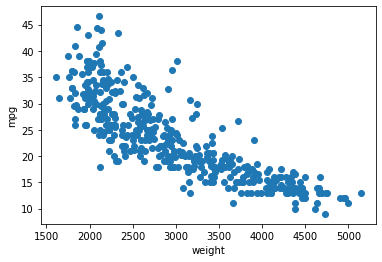

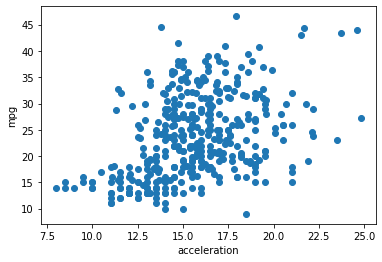

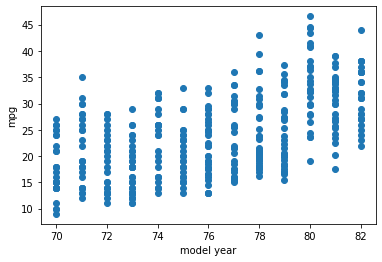

In [481]:

for i in X:
    plt.scatter(x=data[i], y=data[Y])
    plt.xlabel(i)
    plt.ylabel(Y[0])
    plt.show()
   

<h2> Data Imputation </h2>

Data for  cylinders


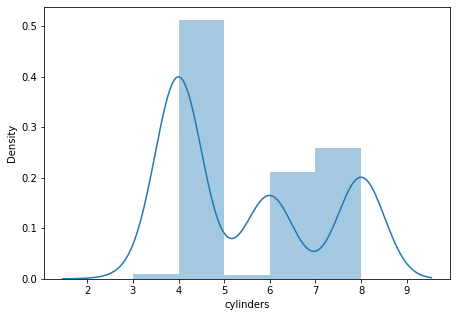

8.0 3.97
Data for  displacement


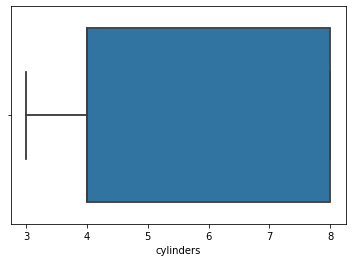

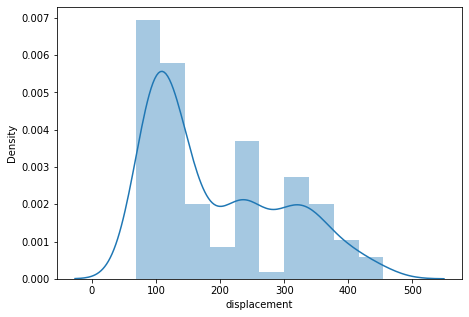

440.4199999999996 70.97
Data for  horsepower


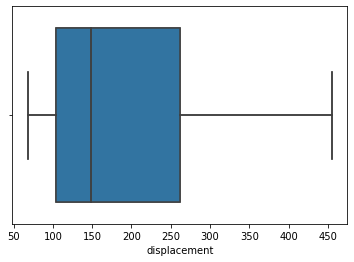

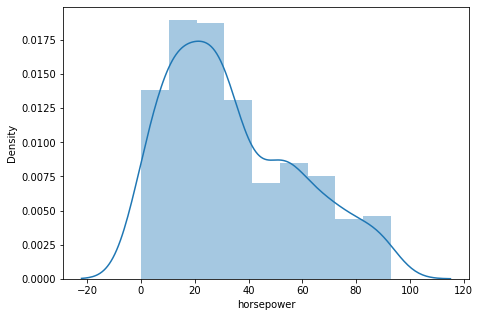

91.0 0.0
Data for  weight


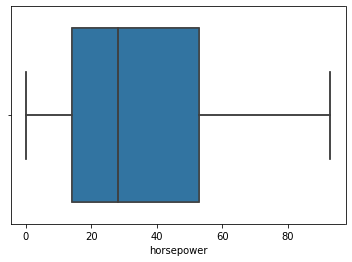

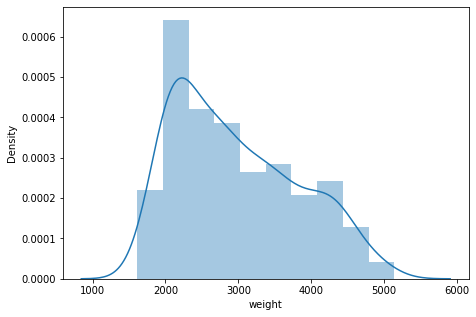

4951.03 1772.61
Data for  acceleration


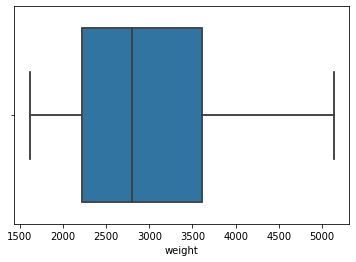

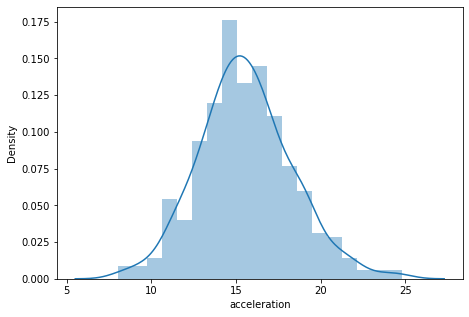

22.238999999999965 9.485
Data for  model year


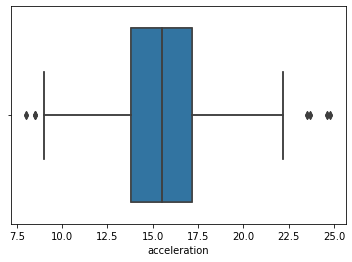

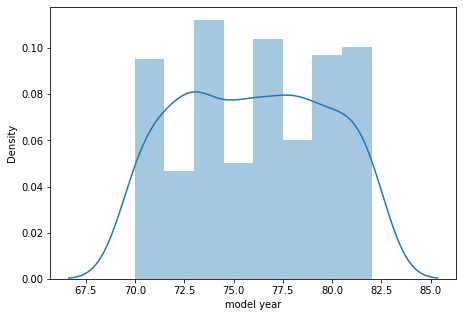

82.0 70.0
Data for  mpg


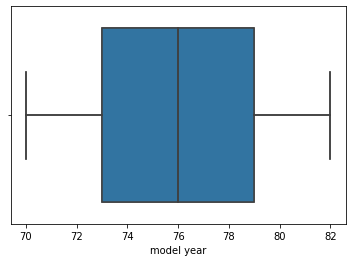

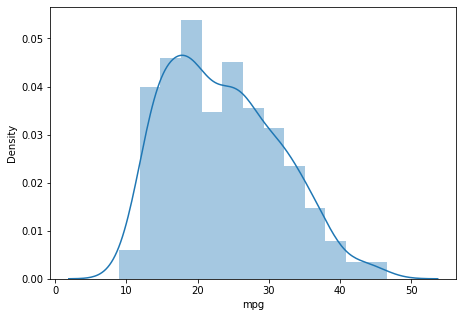

43.417999999999985 11.0
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879   34.193467  2970.424623   
std      7.815984    1.701004    104.269838   24.397738   846.841774   
min      9.000000    3.000000     68.000000    0.000000  1613.000000   
25%     17.500000    4.000000    104.250000   14.000000  2223.750000   
50%     23.000000    4.000000    148.500000   28.000000  2803.500000   
75%     29.000000    8.000000    262.000000   53.000000  3608.000000   
max     46.600000    8.000000    455.000000   93.000000  5140.000000   

       acceleration  model year      origin    car name  
count    398.000000  398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  135.776382  
std        2.757689    3.697627    0.802055   89.114382  
min        8.000000   70.000000    1.000000    0.000000  
25%       13.825000   73.000000    1.

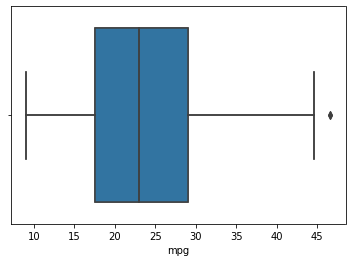

In [482]:
#  For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

# – The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

# where Q1 and Q3 are the 25th and 75th percentile of the dataset 
# respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.
for i in X+Y:
    count=1
    print("Data for ", i)
    plt.figure(figsize=(16,5))
    plt.subplot(count,2,1)
    sns.distplot(data[i])
    plt.show()
    sns.boxplot(data[i])
    upper_limit = data[i].quantile(0.99)
    lower_limit = data[i].quantile(0.01)
    print(upper_limit, lower_limit)
    if i=='temp':
        data = data[(data[i] <= 100 ) & (data[i] > -100)]
    sns.boxplot(data[i])

    count=count+1
print(data.describe())



Data for  cylinders


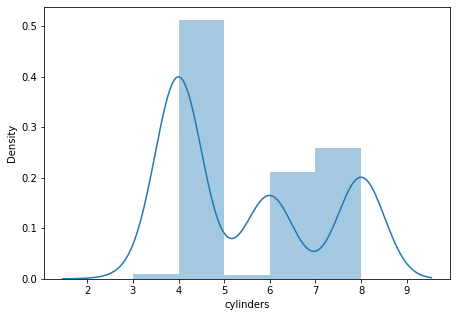

Data for  displacement


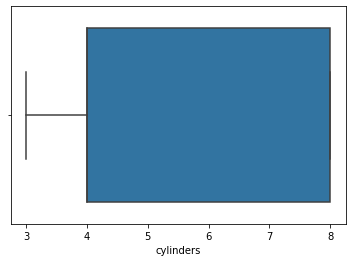

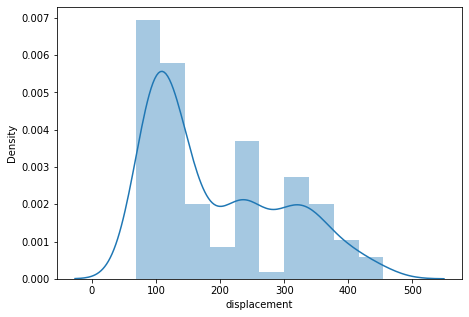

Data for  horsepower


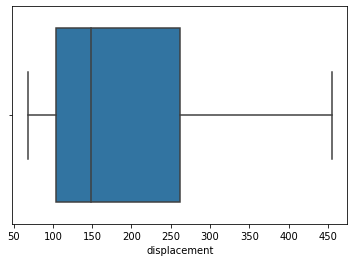

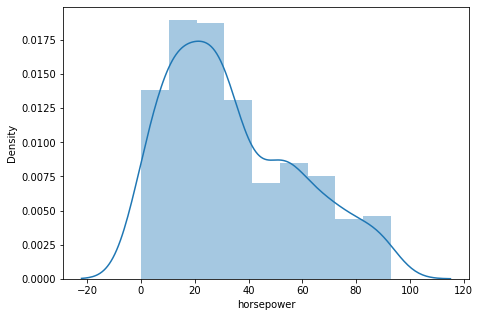

Data for  weight


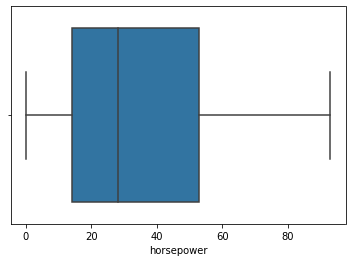

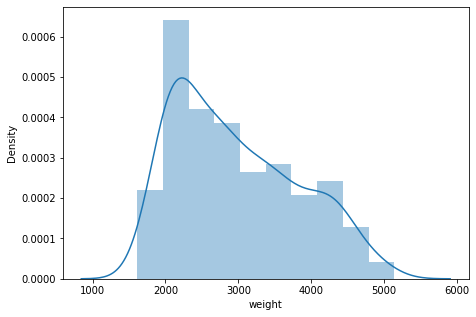

Data for  acceleration


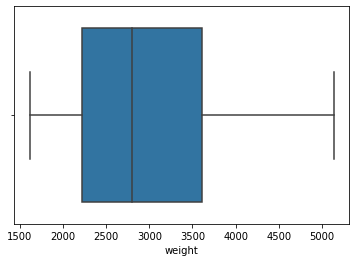

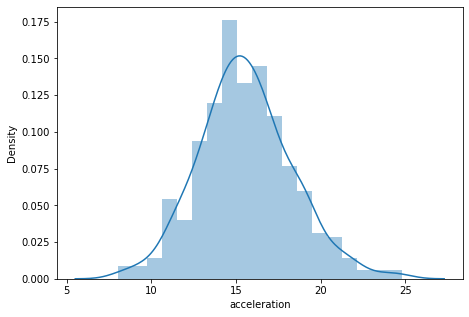

Data for  model year


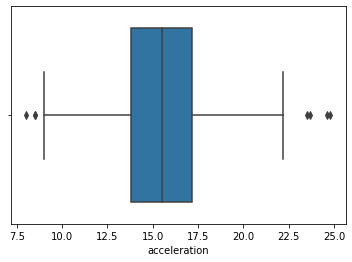

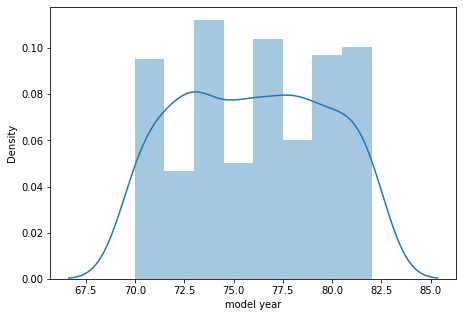

Data for  mpg


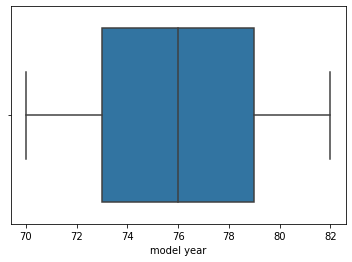

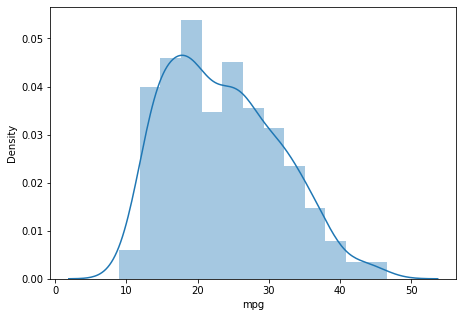

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879   34.193467  2970.424623   
std      7.815984    1.701004    104.269838   24.397738   846.841774   
min      9.000000    3.000000     68.000000    0.000000  1613.000000   
25%     17.500000    4.000000    104.250000   14.000000  2223.750000   
50%     23.000000    4.000000    148.500000   28.000000  2803.500000   
75%     29.000000    8.000000    262.000000   53.000000  3608.000000   
max     46.600000    8.000000    455.000000   93.000000  5140.000000   

       acceleration  model year      origin    car name  
count    398.000000  398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  135.776382  
std        2.757689    3.697627    0.802055   89.114382  
min        8.000000   70.000000    1.000000    0.000000  
25%       13.825000   73.000000    1.000000   55.250000  
50%

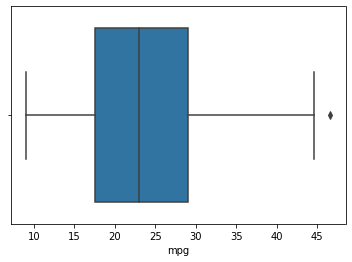

In [483]:
for i in X+Y:
    count=1
    print("Data for ", i)
    plt.figure(figsize=(16,5))
    plt.subplot(count,2,1)
    sns.distplot(data[i])
    plt.show()
    sns.boxplot(data[i])

    count=count+1
print(data.describe())


<h2> Dividing Data to Train and Test </h2>

In [484]:
X_train_x, X_test_x, Y_train_x, Y_test_x = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)
df_train_x=pd.concat([X_train_x, Y_train_x], axis=1).reindex(X_train.index)
df_test_t=pd.concat([X_test_x, Y_test_x], axis=1).reindex(X_test.index)
print(df_train_x.size)
print(df_test_t.size)

2086
700


# Linear Regression

<h2> Forward Selection </h2>

In [485]:
def fs(model, is_forward, is_floating , title, x_data, y_data):
    
    #regr = LinearRegression()


    #Forward Selection
    sfs_f = SFS(model, 
               k_features='best', 
               forward=is_forward, 
               floating=is_floating, 
               verbose=0,
               scoring='r2',
               cv=10)
    sfs_f.fit(x_data, y_data)
    #print(pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T)
    pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

    #fig1 = plot_sfs(sfs_f.get_metric_dict(), kind='std_dev')

#     plt.ylim([0, 1])
#     plt.title('Sequential Forward Selection (w. StdDev)')
#     plt.grid()
#     plt.show()
    feature_list=[]
    cv2_list=[]
    cv_score = [v['avg_score'] for k, v in sfs_f.subsets_.items()]
    k_features = [len(v['feature_idx']) for k, v in sfs_f.subsets_.items()]
    #plt.plot( cv_score,k_features, marker='o')
        #feature_list.append(i['feature_idx'])
    sfs = SFS(model, 
               k_features='best', 
               forward=is_forward, 
               floating=is_floating, 
               verbose=0,
               scoring='r2',
               cv=0)
    sfs.fit(x_data, y_data)
    #print(pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T)
    pd.DataFrame.from_dict(sfs.get_metric_dict()).T  
    r2_score_x = [v['avg_score'] for k, v in sfs.subsets_.items()]
    #r2_score = [len(v['feature_idx']) for k, v in sfs_f.subsets_.items()]
#     for k, v in sfs_f.subsets_.items():
#         print(len(v['feature_idx']))
#         print(v['avg_score'])
    adj_r2_score=[calculate_adj_r2(r2_score_x[i], df_train_x.size, k_features[i]) for i in range(len(r2_score_x))]
    r2_score_x=[r2_score_x[i] for i in range(len(r2_score_x))]
    #print(r2_score_x, adj_r2_score)
    #print(k_features)
    plt.subplots(1,2,figsize=(10,5))
    plt.suptitle(title, fontsize=20)
    plt.subplot(121)
    plt.plot( k_features, r2_score_x,label="r2")
    plt.plot( k_features, adj_r2_score,label="r2 bar")
    plt.legend()
    plt.subplot(122)
    plt.plot( k_features, cv_score,label="r2 cross validation")
    plt.legend()
    plt.show()


In [486]:
print('\nSequential Forward Selection best:')
print(sfs_f.k_feature_idx_)
print('CV Score:')
print(sfs_f.k_score_)
print(sfs_f.k_feature_names_)


Sequential Forward Selection best:
(0, 1, 2, 3, 4, 5, 6, 7)
CV Score:
0.8138849156844667
('cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name')


<h2> Backward Selection </h2>

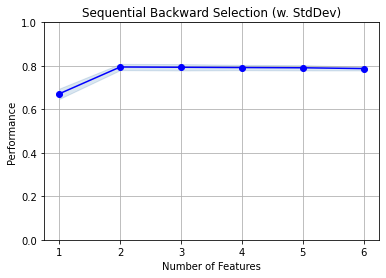

In [487]:
#BackWard Selection
sfs2 = SFS(regr, 
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=5)
sfs2.fit(df_train_x[X], df_train_x[Y])

#print(pd.DataFrame.from_dict(sfs2.get_metric_dict()).T)
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()


In [488]:
print('\nSequential Backward Selection best:')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)


Sequential Backward Selection best:
(3, 5)
CV Score:
0.7947123435236451


# StepWise Selection


          feature_idx                                          cv_scores  \
1                (3,)  [0.6650693023062961, 0.6445742886755506, 0.689...   
2              (3, 5)  [0.8191235813490514, 0.7753747031085078, 0.789...   
3           (0, 3, 5)  [0.818678628140003, 0.7753712632245806, 0.7892...   
4        (0, 3, 4, 5)  [0.8131826220076455, 0.7762012834721292, 0.789...   
5     (0, 1, 3, 4, 5)  [0.8110454019861039, 0.7745301820013812, 0.788...   
6  (0, 1, 2, 3, 4, 5)  [0.8001388920003055, 0.7732420935349129, 0.789...   

  avg_score                                      feature_names  ci_bound  \
1  0.671613                                          (weight,)  0.030507   
2  0.794712                               (weight, model year)  0.018546   
3  0.793518                    (cylinders, weight, model year)  0.018809   
4  0.792252      (cylinders, weight, acceleration, model year)  0.015726   
5  0.791154  (cylinders, displacement, weight, acceleration...  0.015497   
6  0.787416

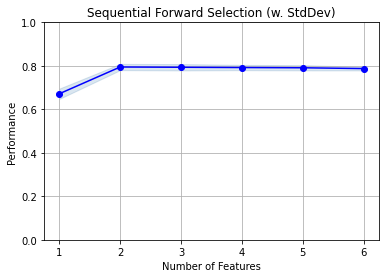

In [489]:
#StepWise Selection
sfs_s = SFS(regr, 
           k_features='best', 
           forward=True, 
           floating=True, 
           verbose=0,
           scoring='r2',
           cv=5)
sfs_s.fit(df_train_x[X], df_train_x[Y])

print(pd.DataFrame.from_dict(sfs_s.get_metric_dict()).T)
fig1 = plot_sfs(sfs_s.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [490]:
sfs2.subsets_
print('\nSequential step wise Selection best:')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)
print(sfs2.k_feature_names_)


Sequential step wise Selection best:
(3, 5)
CV Score:
0.7947123435236451
('weight', 'model year')


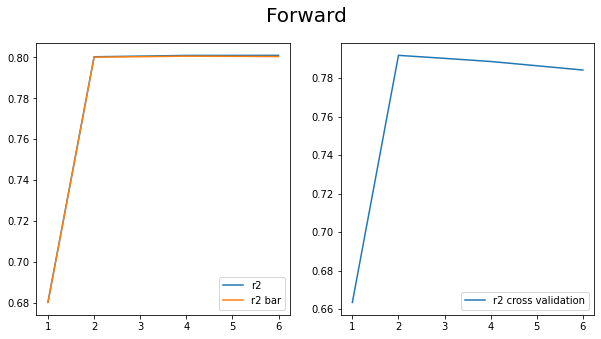

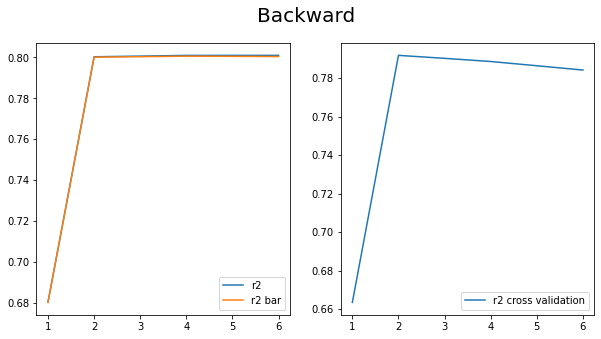

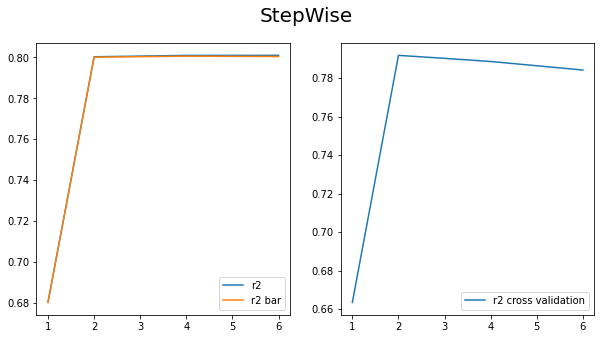

In [491]:
#linear Regression
fs(LinearRegression(), True, False , "Forward",df_train_x[X], df_train_x[Y])
fs(LinearRegression(), False, False  , "Backward",df_train_x[X], df_train_x[Y])
fs(LinearRegression(), True, True  , "StepWise",df_train_x[X], df_train_x[Y])

# Linear Regression


In [492]:
X_T=['weight', 'model year', 'origin']
Y = ['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X_T],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)
df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
print(df_train.size)
print(df_test.size)

1192
400


In [493]:

linear_regr = LinearRegression().fit(X_train, Y_train)

Y_Pred= linear_regr.predict(X_test)


x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X_T))
print("Adj R2",adjusted_r2)


scores = cross_val_score(linear_regr, X_train, Y_train , scoring="r2", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


R2 0.8350774853140814
Adj R2 0.8299236567301465
Folds: 10, MSE: 0.8008594450123969, STD: 0.05717667511995805


# Ridge CV To get Best Alpha

Best Alpha 0.9899999999999995
R2 0.8351387384635716
Adj R2 0.8299868240405581
Folds: 10, MSE: 0.8008902025893008, STD: 0.05724343042072736


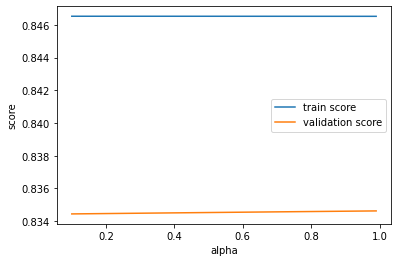

In [494]:

#define model
model_cv = RidgeCV(alphas=np.arange(.1, 1,0.01), cv=5, scoring='neg_mean_absolute_error')

#fit model
model_cv.fit(X_train, Y_train)

#display lambda that produced the lowest test MSE
print("Best Alpha", model_cv.alpha_)

Y_Pred=model_cv.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X_T))
print("Adj R2",adjusted_r2)
scores = cross_val_score(model_cv, X_train, Y_train , scoring="r2", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

train_scores, valid_scores = validation_curve(
 Ridge(), X_test, Y_test, param_name="alpha", param_range=np.arange(.1, 1,0.01),
 cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(np.arange(.1, 1,0.01), train_scores_mean, label="train score")
plt.plot(np.arange(.1, 1,0.01), valid_scores_mean, label="validation score")
plt.legend()
plt.show()


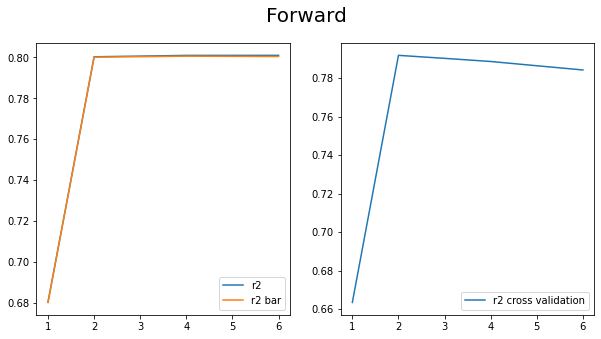

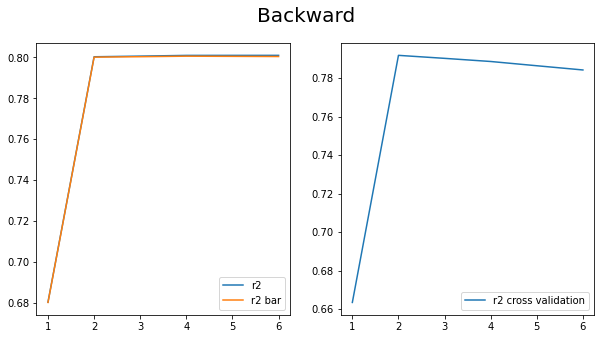

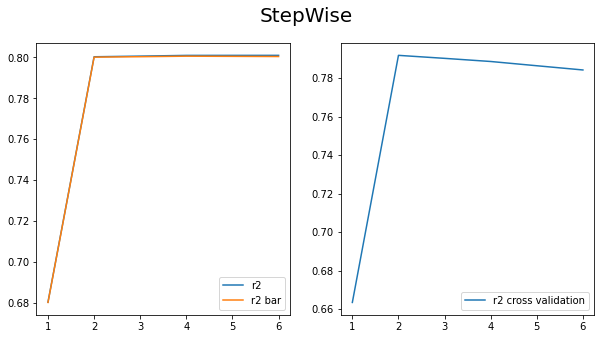

R2 0.8351393461798072
Adj R2 0.8299874507479262


In [495]:
model = Ridge()
fs(Ridge(), True, False , "Forward", df_train_x[X], df_train_x[Y])
fs(Ridge(), False, False  , "Backward",df_train_x[X], df_train_x[Y])
fs(Ridge(), False, True  , "StepWise",df_train_x[X], df_train_x[Y])
model.fit(X_train, Y_train)
Y_Pred=model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X_T))
print("Adj R2",adjusted_r2)

train_scores, _ = validation_curve(model,
                                             X=X_train, y=Y_train,
                                             cv=5, param_name="alpha", param_range=np.arange(.1, 1,0.01),)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#

# _, test_scores = validation_curve(model,
#                                              X=data[X], y=data[Y],
#                                              cv=5, param_name="alpha", param_range=np.arange(.1, 1,0.01),)
# train_mean = np.mean(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# plt.plot(np.arange(.1, 1,0.01), train_mean,
#          marker='o', markersize=5,
#          color='blue', label='Training Accuracy')
# plt.plot(np.arange(.1, 1,0.01), test_mean,
#          marker='o', markersize=5,
#          color='green', label='Validation Accuracy')
# plt.xlabel('Parameter C')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.show()

# Symbolic Regression

In [496]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, Y_train)
score_gp = est_gp.score(X_train, Y_train)
print(score_gp)
Y_Pred=est_gp.predict(X_test)
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X_T))
print("Adj R2",adjusted_r2)
scores = cross_val_score(model_cv, X_train, Y_train , scoring="r2", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

# fs(est_gp, True, False , "Forward",df_train_x[X], df_train_x[Y])
# fs(est_gp, False, False  , "Backward",df_train_x[X], df_train_x[Y])
# fs(est_gp, False, True  , "StepWise",df_train_x[X], df_train_x[Y])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    33.42      2.86478e+26       25          5.36218          5.45975      1.41m
   1    19.01       6.9813e+15       13          4.75148          5.44457     59.27s
   2    24.18       7.2359e+08       17          2.49363          1.91404     56.79s
   3    20.46      3.90249e+06       17          2.37674           2.9582     47.46s
   4    23.43      1.37264e+10       17           2.4177          2.59232     40.47s
   5    22.82      8.24443e+08       19          2.25053          2.11364     33.10s
   6    21.05      2.22082e+09       23          2.17113          3.17656     26.73s
   7    19.29      1.52932e+09       19          2.13066          3.18446     15.99s
   8    18.05      4.87698e+08       21           2.1114          3.51407  

# Lasso Regression

R2 0.8341870182234833
Adj R2 0.8290053625429672
Folds: 10, MSE: 0.8008902025893008, STD: 0.05724343042072736


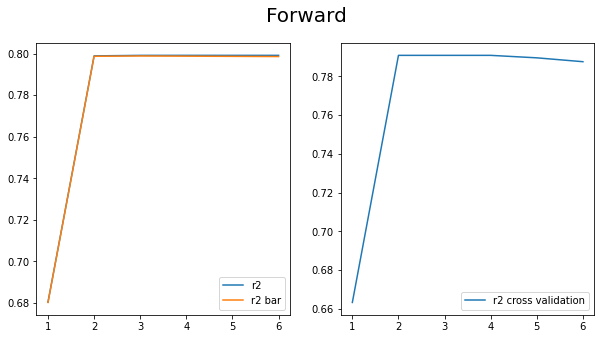

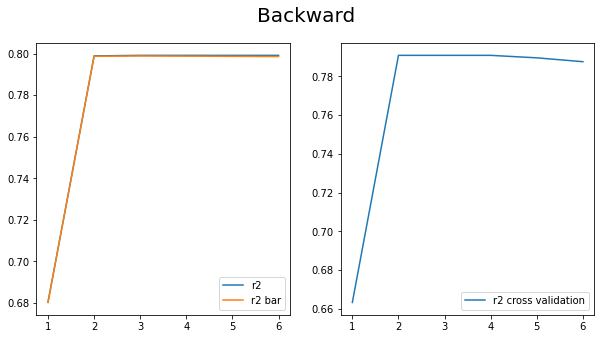

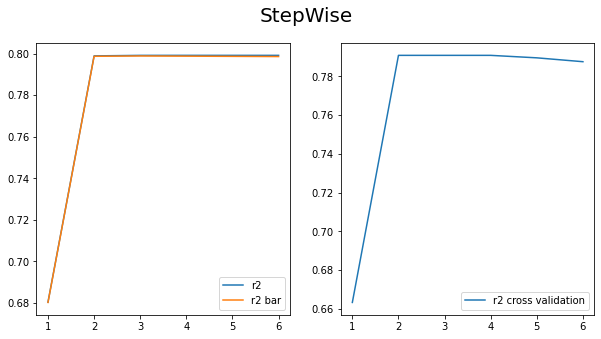

In [497]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
Y_Pred=lasso_model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X_T))
print("Adj R2",adjusted_r2)
scores = cross_val_score(model_cv, X_train, Y_train , scoring="r2", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

fs(Lasso(), True, False , "Forward",df_train_x[X], df_train_x[Y])
fs(Lasso(), False, False  , "Backward",df_train_x[X], df_train_x[Y])
fs(Lasso(), False, True  , "StepWise",df_train_x[X], df_train_x[Y])

# Lasso Regression

In [498]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_l_cv = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_l_cv.fit(X_train, Y_train)
print(model_l_cv.alpha_)
lasso_best = Lasso(alpha=model_l_cv.alpha_)
lasso_best.fit(X_train, Y_train)
Y_Pred=lasso_best.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X_T))
print("Adj R2",adjusted_r2)

scores = cross_val_score(model_cv, X_test, Y_test , scoring="r2", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))



5.422754488536552
R2 0.810882236598091
Adj R2 0.8049723064917813
Folds: 10, MSE: 0.8340373230122872, STD: 0.0738005386892931


# Quadratic Regression

R2 0.885750572386979
Adj R2 0.882180277774072
Max Error 8.51943495436393


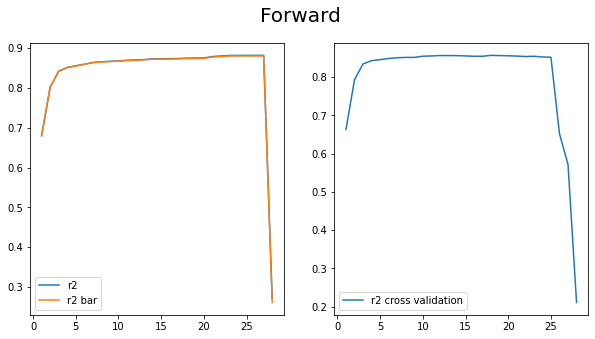

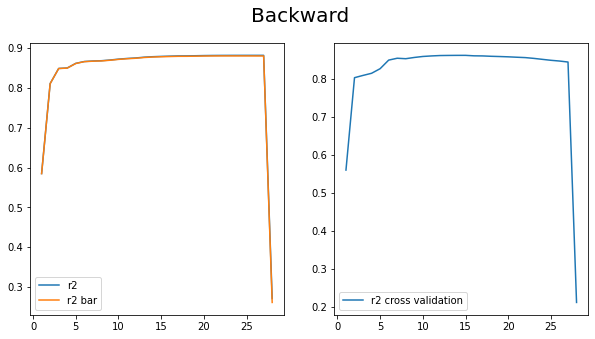

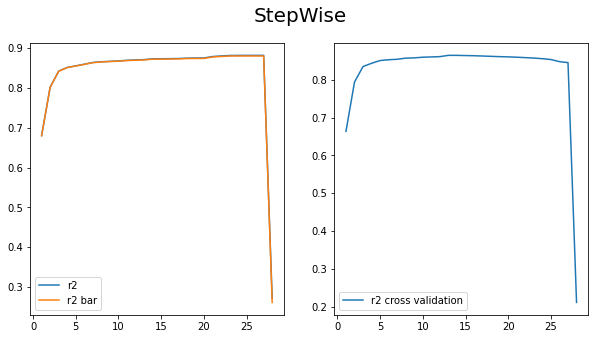

In [499]:
f_poly = PolynomialFeatures(degree = 2)
Xf_poly = poly.fit_transform(X_train_x)
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, Y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train)
Y_Pred= lin2.predict(poly.fit_transform(X_test))
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X_T))
print("Adj R2",adjusted_r2)
print("Max Error", max_error(Y_test, Y_Pred))
fs(LinearRegression(), True, False , "Forward",Xf_poly, Y_train_x)
fs(LinearRegression(), False, False  , "Backward",Xf_poly, Y_train_x)
fs(LinearRegression(), True, True  , "StepWise",Xf_poly, Y_train_x)

# Symbolic Ridge Regression 

In [500]:
#Symbolic Ridge Regression 
print(df_encode.size)
est = Ridge()
est.fit(df_encode[X_T][:200],df_encode[Y][:200])
print(est.score(df_encode[X_T][100:],df_encode[Y][100:]))


3582
0.6501166437147639


In [501]:
print(data.size)

3582


In [502]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)
gp.fit(data[X_T][:200],data[Y][:200])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.62         0.549861        8         0.940728         0.860625     46.34s
   1     9.10         0.765212        3         0.944044         0.849759     27.00s
   2     6.71          0.77482       22         0.946767         0.789735     22.79s
   3     5.96         0.812605       13         0.944933         0.785837     22.87s
   4     4.56         0.839697        3         0.946593         0.722291     20.24s
   5     3.76         0.853334        3         0.947558         0.803139     26.11s
   6     3.40         0.873567        4         0.948302          0.79029     20.61s
   7     3.31         0.865046        3         0.948323         0.814683     18.14s
   8     3.29         0.876869        4         0.948143         0.796931  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.9, n_jobs=3, parsimony_coefficient=0.0005,
                    population_size=2000, random_state=0, verbose=1)

In [503]:
35880
11960
print(len(data[Y]))
print(len(data[Y][200:]))
gp_features = gp.transform(data[X_T])
new_data = np.hstack((data[X_T], gp_features))


398
198


In [504]:
est = Ridge()
est.fit(new_data[:200],data[Y][:200])
print(est.score(new_data[200:],data[Y][200:]))
Y_Pred= est.predict(new_data[200:])

x=r2_score(data[Y][200:], Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, len(new_data[200:]),len(X_T))
print("Adj R2",adjusted_r2)
print(max_error(data[Y][200:], Y_Pred))


0.537452723564521
R2 0.537452723564521
Adj R2 0.5302999306299518
16.775341306459953


# Symbolic Lasso Regression 

In [505]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)
gp.fit(data[X_T][:200],data[Y][:200])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.62         0.549861        8         0.940728         0.860625     35.46s
   1     9.10         0.765212        3         0.944044         0.849759     24.52s
   2     6.71          0.77482       22         0.946767         0.789735     22.79s
   3     5.96         0.812605       13         0.944933         0.785837     20.30s
   4     4.56         0.839697        3         0.946593         0.722291     23.19s
   5     3.76         0.853334        3         0.947558         0.803139     20.86s
   6     3.40         0.873567        4         0.948302          0.79029     19.58s
   7     3.31         0.865046        3         0.948323         0.814683     20.74s
   8     3.29         0.876869        4         0.948143         0.796931  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.9, n_jobs=3, parsimony_coefficient=0.0005,
                    population_size=2000, random_state=0, verbose=1)

In [506]:
gp_features = gp.transform(data[X_T])
new_data = np.hstack((data[X_T], gp_features))

In [507]:
#Symbolic Lasso Regression 
sym_lasso = Lasso()
sym_lasso.fit(new_data[:200],data[Y][:200])

print(sym_lasso.score(new_data[200:],data[Y][200:]))
Y_Pred= sym_lasso.predict(new_data[200:])

x=r2_score(data[Y][200:], Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, len(new_data[200:]),len(X_T))
print("Adj R2",adjusted_r2)
print(max_error(data[Y][200:], Y_Pred))

0.24990676746481888
R2 0.24990676746481888
Adj R2 0.23830738758025416
20.22123873234269
